In [3]:
import pandas as pd

# Assignment 1: pd.Concat

Combine the 2014 and 2015 data you wrote out in the last section into a single dataframe. 

Then delete the transactions DataFrame (there is a handy base Python keyword for this).

In [ ]:
# Code to read in transactions data if you need to re-create CSV/Excel files from section 8 
# NOTE: You won't have the extra columns we created but it won't matter for this assignment

# transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

# Excel

# with pd.ExcelWriter("DataForChandler.xlsx") as writer:
#     for year in range(2013, 2018):
#         transactions.loc[transactions["date"].dt.year == year].to_excel(
#             writer, sheet_name=str(year)
#         )
        
# CSV  

# for year in range(2013, 2018):
#     transactions.loc[transactions["date"].dt.year == year].to_csv(
#         f"transactions_{year}.csv"
#     )

In [9]:
address = r"D:/AA/Programming/Data Science/Maven-Analytics/Python/Data Analysis With Python AND Pandas/Pandas+Course+Resources/Pandas Course Resources/retail/transactions.csv"
columns_name = ["Date" , "Store_Number" , "Transaction_Count"]
transaction = pd.read_csv(address , 
                          header = 0 , names = columns_name , 
                          skiprows = 0 , 
                          infer_datetime_format= True , 
                          parse_dates = ["Date"] , 
                          dtype = ({"Store_Number" : "int8" , 
                                     "Transaction_Count" : "Int16"}))

transaction.assign(
    Target_pct = transaction["Transaction_Count"] / 2500 , 
    Met_Target = (transaction["Transaction_Count"] / 2500) >= 1,
    Bonus_Payable = ((transaction["Transaction_Count"] / 2500) >= 1) * 100,     
    Month = transaction["Date"].dt.month,     
    Day_of_Week = transaction["Date"].dt.dayofweek).astype({
    "Target_pct" : "float16" , 
    "Bonus_Payable" : "Int16" , 
    "Month" : "Int8",
    "Day_of_Week" : "int8"})
transaction
#YEARS = [2014, 2015, 2016, 2017]
# with pd.ExcelWriter("DataForChandler.xlsx") as writer:
#     for years in YEARS:
#         transaction.loc[transaction.Date.dt.year == years].to_excel(writer , sheet_name = str(years))

C:\Users\ahmad\AppData\Local\Temp\ipykernel_21884\1418811850.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  transaction = pd.read_csv(address ,


,Date,Store_Number,Transaction_Count
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [10]:
transaction.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               83488 non-null  datetime64[ns]
 1   Store_Number       83488 non-null  int8          
 2   Transaction_Count  83488 non-null  Int16         
dtypes: Int16(1), datetime64[ns](1), int8(1)
memory usage: 978.5 KB


In [71]:
pd.read_excel("DataForChandler.xlsx")

,Unnamed: 0,Date,Store_Number,Transaction_Count
0,16908,2014-01-01,25,840
1,16909,2014-01-01,36,487
2,16910,2014-01-02,1,1875
3,16911,2014-01-02,2,2122
4,16912,2014-01-02,3,3350
...,...,...,...,...
17133,34041,2014-12-31,49,3625
17134,34042,2014-12-31,50,3049
17135,34043,2014-12-31,51,2947
17136,34044,2014-12-31,53,2217


# Assignment 2: Joins

Can you join retail.csv with stores.csv? You'll need to read both files in.

Once you have that, plot:
* Total sales by city, 
* The sum of sales by “type” over time,
* A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”. 


In [ ]:
pd.read_csv()

In [26]:
file_address = r"D:/AA/Programming/Data Science/Maven-Analytics/Python/Data Analysis With Python AND Pandas/Pandas+Course+Resources/Pandas Course Resources/retail/"
Retail_df = pd.read_csv(filepath_or_buffer = file_address + "retail_2016_2017.csv",
                        header = 0,
                        infer_datetime_format=True,
                        parse_dates= ['date'],
                        dtype={'stpre_nbr':'int8', 
                               'sales':'float32', 
                               'family':'category', 
                               'onpromotion':'int8'}
                       )
Retail_df

C:\Users\ahmad\AppData\Local\Temp\ipykernel_21884\2259492435.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Retail_df = pd.read_csv(filepath_or_buffer = file_address + "retail_2016_2017.csv",


,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.000000,0
1,1945945,2016-01-01,1,BABY CARE,0.000000,0
2,1945946,2016-01-01,1,BEAUTY,0.000000,0
3,1945947,2016-01-01,1,BEVERAGES,0.000000,0
4,1945948,2016-01-01,1,BOOKS,0.000000,0
...,...,...,...,...,...,...
1054939,3000883,2017-08-15,9,POULTRY,438.132996,0
1054940,3000884,2017-08-15,9,PREPARED FOODS,154.552994,1
1054941,3000885,2017-08-15,9,PRODUCE,2419.729004,-108
1054942,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,8


In [27]:
Retail_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  category      
 4   sales        1054944 non-null  float32       
 5   onpromotion  1054944 non-null  int8          
dtypes: category(1), datetime64[ns](1), float32(1), int64(2), int8(1)
memory usage: 30.2 MB


In [19]:
Retail_df.describe(include='all').loc[['min','max'] , :]

,id,date,store_nbr,family,sales,onpromotion
min,1945944.0,2016-01-01 00:00:00,1.0,NaN,0.0,0.0
max,3000887.0,2017-08-15 00:00:00,54.0,NaN,124717.0,741.0


In [65]:
Stores_df = pd.read_csv(filepath_or_buffer= address + "stores.csv",
                        header = 0,
                        infer_datetime_format=True,
                        names= ['store_nbr', 'city', 'state', 'type1', 'cluster'],
                        dtype={
                            'store_nbr' : 'int8',
                            'cluster': 'int8',
                            'city': 'category',
                            'state':'category',
                            'type1':'category'
                        }                     
                       )
Stores_df.head()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_21884\4214321652.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Stores_df = pd.read_csv(filepath_or_buffer= address + "stores.csv",


,store_nbr,city,state,type1,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [32]:
Stores_df.describe().loc[['min','max'] , :]

,store_nbr,cluster
min,1.0,1.0
max,54.0,17.0


In [66]:
Stores_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   store_nbr  54 non-null     int8    
 1   city       54 non-null     category
 2   state      54 non-null     category
 3   type1      54 non-null     category
 4   cluster    54 non-null     int8    
dtypes: category(3), int8(2)
memory usage: 4.3 KB


In [72]:
concat_dfs = pd.concat((Stores_df,Retail_df), ignore_index = True)
concat_dfs

,store_nbr,city,state,type1,cluster,id,date,family,sales,onpromotion
0,1,Quito,Pichincha,D,13.0,NaN,NaT,NaN,NaN,NaN
1,2,Quito,Pichincha,D,13.0,NaN,NaT,NaN,NaN,NaN
2,3,Quito,Pichincha,D,8.0,NaN,NaT,NaN,NaN,NaN
3,4,Quito,Pichincha,D,9.0,NaN,NaT,NaN,NaN,NaN
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4.0,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1054993,9,NaN,NaN,NaN,NaN,3000883.0,2017-08-15,POULTRY,438.132996,0.0
1054994,9,NaN,NaN,NaN,NaN,3000884.0,2017-08-15,PREPARED FOODS,154.552994,1.0
1054995,9,NaN,NaN,NaN,NaN,3000885.0,2017-08-15,PRODUCE,2419.729004,-108.0
1054996,9,NaN,NaN,NaN,NaN,3000886.0,2017-08-15,SCHOOL AND OFFICE SUPPLIES,121.000000,8.0


In [73]:
Stores_df.columns

Index(['store_nbr', 'city', 'state', 'type1', 'cluster'], dtype='object')

In [74]:
Retail_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [75]:
(Stores_df.columns).intersection(Retail_df.columns)

Index(['store_nbr'], dtype='object')

In [ ]:
Stores_df.merge()

In [84]:
Inner_Merge_DF = Stores_df.merge(right = Retail_df , 
                how = 'inner', 
                left_on='store_nbr', 
                right_on= 'store_nbr'
               )
Inner_Merge_DF

,store_nbr,city,state,type1,cluster,id,date,family,sales,onpromotion
0,1,Quito,Pichincha,D,13,1945944,2016-01-01,AUTOMOTIVE,0.000000,0
1,1,Quito,Pichincha,D,13,1945945,2016-01-01,BABY CARE,0.000000,0
2,1,Quito,Pichincha,D,13,1945946,2016-01-01,BEAUTY,0.000000,0
3,1,Quito,Pichincha,D,13,1945947,2016-01-01,BEVERAGES,0.000000,0
4,1,Quito,Pichincha,D,13,1945948,2016-01-01,BOOKS,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1054939,54,El Carmen,Manabi,C,3,3000751,2017-08-15,POULTRY,59.618999,0
1054940,54,El Carmen,Manabi,C,3,3000752,2017-08-15,PREPARED FOODS,94.000000,0
1054941,54,El Carmen,Manabi,C,3,3000753,2017-08-15,PRODUCE,915.370972,76
1054942,54,El Carmen,Manabi,C,3,3000754,2017-08-15,SCHOOL AND OFFICE SUPPLIES,0.000000,0


In [85]:
Right_Merge_DF = Stores_df.merge(right = Retail_df , 
                how = 'right', 
                left_on='store_nbr', 
                right_on= 'store_nbr'
               )
Right_Merge_DF

,store_nbr,city,state,type1,cluster,id,date,family,sales,onpromotion
0,1,Quito,Pichincha,D,13,1945944,2016-01-01,AUTOMOTIVE,0.000000,0
1,1,Quito,Pichincha,D,13,1945945,2016-01-01,BABY CARE,0.000000,0
2,1,Quito,Pichincha,D,13,1945946,2016-01-01,BEAUTY,0.000000,0
3,1,Quito,Pichincha,D,13,1945947,2016-01-01,BEVERAGES,0.000000,0
4,1,Quito,Pichincha,D,13,1945948,2016-01-01,BOOKS,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1054939,9,Quito,Pichincha,B,6,3000883,2017-08-15,POULTRY,438.132996,0
1054940,9,Quito,Pichincha,B,6,3000884,2017-08-15,PREPARED FOODS,154.552994,1
1054941,9,Quito,Pichincha,B,6,3000885,2017-08-15,PRODUCE,2419.729004,-108
1054942,9,Quito,Pichincha,B,6,3000886,2017-08-15,SCHOOL AND OFFICE SUPPLIES,121.000000,8


In [86]:
Left_Merge_DF = Stores_df.merge(right = Retail_df , 
                how = 'left', 
                left_on='store_nbr', 
                right_on= 'store_nbr'
               )
Left_Merge_DF

,store_nbr,city,state,type1,cluster,id,date,family,sales,onpromotion
0,1,Quito,Pichincha,D,13,1945944,2016-01-01,AUTOMOTIVE,0.000000,0
1,1,Quito,Pichincha,D,13,1945945,2016-01-01,BABY CARE,0.000000,0
2,1,Quito,Pichincha,D,13,1945946,2016-01-01,BEAUTY,0.000000,0
3,1,Quito,Pichincha,D,13,1945947,2016-01-01,BEVERAGES,0.000000,0
4,1,Quito,Pichincha,D,13,1945948,2016-01-01,BOOKS,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1054939,54,El Carmen,Manabi,C,3,3000751,2017-08-15,POULTRY,59.618999,0
1054940,54,El Carmen,Manabi,C,3,3000752,2017-08-15,PREPARED FOODS,94.000000,0
1054941,54,El Carmen,Manabi,C,3,3000753,2017-08-15,PRODUCE,915.370972,76
1054942,54,El Carmen,Manabi,C,3,3000754,2017-08-15,SCHOOL AND OFFICE SUPPLIES,0.000000,0


In [87]:
Outer_Merge_DF = Stores_df.merge(right = Retail_df , 
                how = 'outer', 
                left_on='store_nbr', 
                right_on= 'store_nbr'
               )
Outer_Merge_DF

,store_nbr,city,state,type1,cluster,id,date,family,sales,onpromotion
0,1,Quito,Pichincha,D,13,1945944,2016-01-01,AUTOMOTIVE,0.000000,0
1,1,Quito,Pichincha,D,13,1945945,2016-01-01,BABY CARE,0.000000,0
2,1,Quito,Pichincha,D,13,1945946,2016-01-01,BEAUTY,0.000000,0
3,1,Quito,Pichincha,D,13,1945947,2016-01-01,BEVERAGES,0.000000,0
4,1,Quito,Pichincha,D,13,1945948,2016-01-01,BOOKS,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
1054939,54,El Carmen,Manabi,C,3,3000751,2017-08-15,POULTRY,59.618999,0
1054940,54,El Carmen,Manabi,C,3,3000752,2017-08-15,PREPARED FOODS,94.000000,0
1054941,54,El Carmen,Manabi,C,3,3000753,2017-08-15,PRODUCE,915.370972,76
1054942,54,El Carmen,Manabi,C,3,3000754,2017-08-15,SCHOOL AND OFFICE SUPPLIES,0.000000,0


In [123]:
Sales_By_City = (Left_Merge_DF.groupby('city').
                 agg({'sales': 'sum'}).
                 sort_values(['sales'],ascending= False).
                 round(2))
Sales_By_City

,sales
city,
Quito,2.476989e+08
Guayaquil,5.522230e+07
Cuenca,2.480080e+07
Ambato,1.693945e+07
Santo Domingo,1.683743e+07
Machala,1.556695e+07
Cayambe,1.169848e+07
Manta,9.973213e+06
Daule,8.739034e+06


In [108]:
import seaborn as sns
import matplotlib

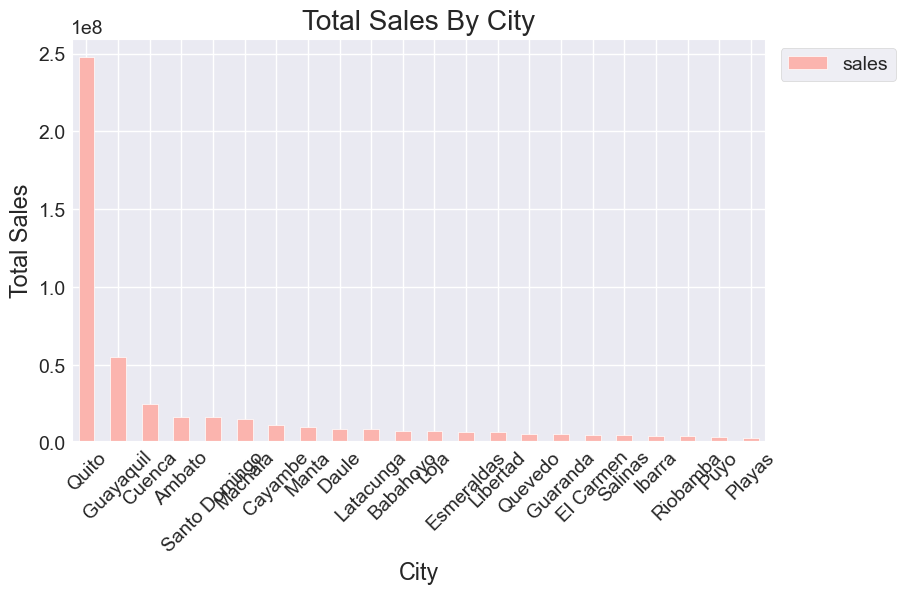

In [122]:
Sales_By_City.plot(kind = 'bar' , 
                   title = 'Total Sales By City',
                   xlabel = 'City',
                   ylabel = 'Total Sales',
                   cmap = 'Pastel1',
                   grid = True,
                   figsize = (8,5),
                   rot = 45
                  ).legend(bbox_to_anchor = (1.2 , 1));

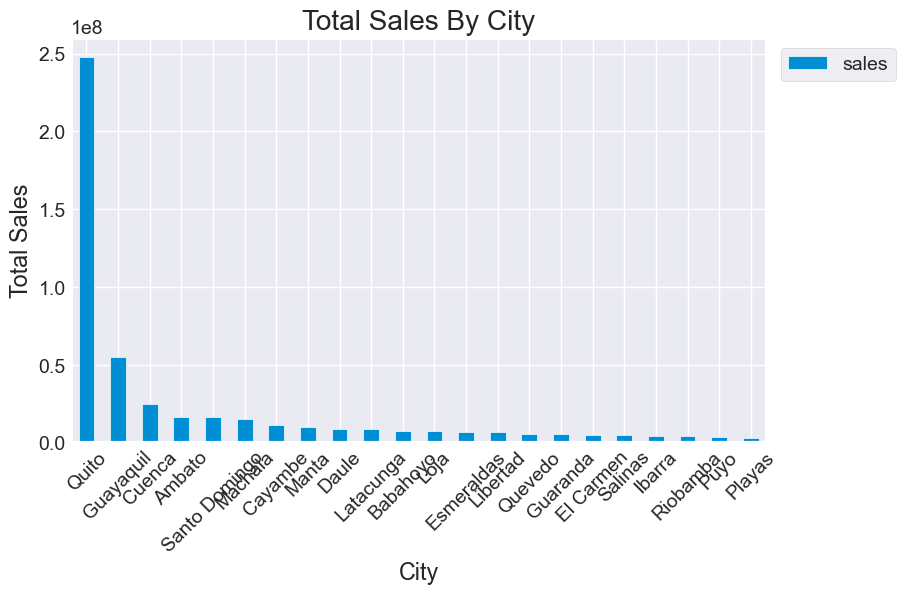

In [121]:
sns.set_style("darkgrid")
Sales_By_City.plot(kind = 'bar' , 
                   title = 'Total Sales By City',
                   xlabel = 'City',
                   ylabel = 'Total Sales',
                   #cmap = 'Pastel1',
                   grid = True,
                   figsize = (8,5),
                   rot = 45
                  ).legend(bbox_to_anchor = (1.2 , 1));

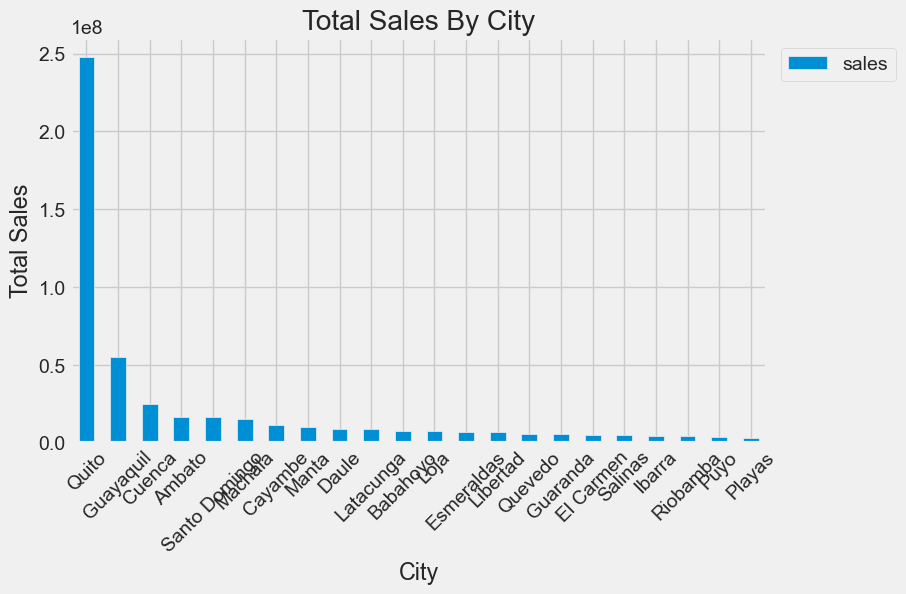

In [120]:
matplotlib.style.use("fivethirtyeight")

Sales_By_City.plot(kind = 'bar' , 
                   title = 'Total Sales By City',
                   xlabel = 'City',
                   ylabel = 'Total Sales',
                   #cmap = 'Pastel1',
                   grid = True,
                   figsize = (8,5),
                   rot = 45
                  ).legend(bbox_to_anchor = (1.2 , 1));

In [ ]:
# Once you have that, plot:

# Total sales by city,
# The sum of sales by “type” over time,
# A stacked bar chart with average daily sales by type by month, with “type” as the “stacks”.